In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline

# CARGA DE DATOS

In [2]:
bikes = pd.read_csv('../data/bike_buyers.csv')

In [3]:
bikes.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


# INSPECCIÓN DE DATOS

In [4]:
bikes['ID'].nunique()

1000

**SE VALIDÓ QUE TODO LOS ID's SON ÚNICOS PARA ESTABLECERLO COMO INDICES EN EL DATAFRAME**

In [5]:
bikes.set_index('ID',inplace=True)

In [6]:
bikes.head(10)

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
ID,,,,,,,,,,,,
12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No


In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 12496 to 12121
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marital Status    993 non-null    object 
 1   Gender            989 non-null    object 
 2   Income            994 non-null    float64
 3   Children          992 non-null    float64
 4   Education         1000 non-null   object 
 5   Occupation        1000 non-null   object 
 6   Home Owner        996 non-null    object 
 7   Cars              991 non-null    float64
 8   Commute Distance  1000 non-null   object 
 9   Region            1000 non-null   object 
 10  Age               992 non-null    float64
 11  Purchased Bike    1000 non-null   object 
dtypes: float64(4), object(8)
memory usage: 101.6+ KB


**SE IDENTIFICAN DATOS NULOS EN LAS SIGUIENTES VARIABLES: *MARITAL STATUS*, *GENDER*, *INCOME*, *CHILDREN*, *HOME OWNER*, *CATS AGE***

In [8]:
bikes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Income,994.0,56267.605634,31067.817462,10000.0,30000.0,60000.0,70000.0,170000.0
Children,992.0,1.910282,1.626910,0.0,0.0,2.0,3.0,5.0
Cars,991.0,1.455096,1.121755,0.0,1.0,1.0,2.0,4.0
Age,992.0,44.181452,11.362007,25.0,35.0,43.0,52.0,89.0


In [9]:
bikes.isna().sum()

Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

***TABLAS DE FRECUENCIA***

In [10]:
frequency = bikes['Children'].value_counts(dropna=False).sort_index()
df = pd.Series(frequency,name='Total')
df = df.to_frame()
df['Porcentaje'] = (df['Total']/1000)*100
print(df)

     Total  Porcentaje
0.0    274        27.4
1.0    169        16.9
2.0    209        20.9
3.0    133        13.3
4.0    126        12.6
5.0     81         8.1
NaN      8         0.8


In [11]:
frequency = bikes['Cars'].value_counts(dropna=False).sort_index()
df = pd.Series(frequency,name='Total')
df = df.to_frame()
df['Porcentaje'] = (df['Total']/1000)*100
print(df)

     Total  Porcentaje
0.0    238        23.8
1.0    267        26.7
2.0    342        34.2
3.0     85         8.5
4.0     59         5.9
NaN      9         0.9


In [12]:
frequency = bikes['Marital Status'].value_counts(dropna=False)
df = pd.Series(frequency, name = 'Total')
df = df.to_frame()
df['Porcentaje'] = (df['Total']/1000)*100
print(df)

         Total  Porcentaje
Married    535        53.5
Single     458        45.8
NaN          7         0.7


In [13]:
frequency = bikes['Gender'].value_counts(dropna=False)
df = pd.Series(frequency,name='Total')
df = df.to_frame()
df['Porcentaje'] = (df['Total']/1000)*100
print(df)

        Total  Porcentaje
Male      500        50.0
Female    489        48.9
NaN        11         1.1


In [14]:
frequency = bikes['Education'].value_counts(dropna=False)
df = pd.Series(frequency, name='Total')
df = df.to_frame()
df['Porcentaje'] = (df['Total']/1000)*100
print(df)

                     Total  Porcentaje
Bachelors              306        30.6
Partial College        265        26.5
High School            179        17.9
Graduate Degree        174        17.4
Partial High School     76         7.6


In [15]:
frequency = bikes['Occupation'].value_counts(dropna=False)
df = pd.Series(frequency, name='Total')
df = df.to_frame()
df['Porcentaje'] = (df['Total']/1000)*100
print(df)

                Total  Porcentaje
Professional      276        27.6
Skilled Manual    255        25.5
Clerical          177        17.7
Management        173        17.3
Manual            119        11.9


In [16]:
frequency = bikes['Home Owner'].value_counts(dropna=False)
df = pd.Series(frequency, name='Total')
df = df.to_frame()
df['Porcentaje'] = (df['Total']/1000)*100
print(df)

     Total  Porcentaje
Yes    682        68.2
No     314        31.4
NaN      4         0.4


In [17]:
frequency = bikes['Commute Distance'].value_counts(dropna=False)
df = pd.Series(frequency, name='Total')
df = df.to_frame()
df['Porcentaje'] = (df['Total']/1000)*100
print(df)

            Total  Porcentaje
0-1 Miles     366        36.6
5-10 Miles    192        19.2
1-2 Miles     169        16.9
2-5 Miles     162        16.2
10+ Miles     111        11.1


In [18]:
frequency = bikes['Region'].value_counts(dropna=False)
df = pd.Series(frequency, name = 'Total')
df = df.to_frame()
df['Porcentaje'] = (df['Total']/1000)*100
print(df)

               Total  Porcentaje
North America    508        50.8
Europe           300        30.0
Pacific          192        19.2


In [19]:
frequency = bikes['Purchased Bike'].value_counts(dropna=False)
df = pd.Series(frequency, name = 'Total')
df = df.to_frame()
df['Porcentaje'] = (df['Total']/1000)*100
print(df)

     Total  Porcentaje
No     519        51.9
Yes    481        48.1


In [20]:
frequency = bikes['Age'].value_counts(dropna=False).sort_index()
df = pd.Series(frequency, name = 'Total')
df = df.to_frame()
df['Porcentaje'] = (df['Total']/1000)*100
print(df)

      Total  Porcentaje
25.0      5         0.5
26.0     16         1.6
27.0     23         2.3
28.0     22         2.2
29.0     16         1.6
30.0     26         2.6
31.0     25         2.5
32.0     33         3.3
33.0     21         2.1
34.0     31         3.1
35.0     35         3.5
36.0     37         3.7
37.0     32         3.2
38.0     37         3.7
39.0     22         2.2
40.0     40         4.0
41.0     28         2.8
42.0     34         3.4
43.0     36         3.6
44.0     27         2.7
45.0     31         3.1
46.0     27         2.7
47.0     39         3.9
48.0     29         2.9
49.0     23         2.3
50.0     23         2.3
51.0     22         2.2
52.0     25         2.5
53.0     24         2.4
54.0     16         1.6
55.0     17         1.7
56.0     16         1.6
57.0      8         0.8
58.0     12         1.2
59.0     20         2.0
60.0     14         1.4
61.0      9         0.9
62.0     13         1.3
63.0      9         0.9
64.0     10         1.0
65.0      9     

In [15]:
bikes.loc[(bikes['Children'] > 0) & (bikes['Marital Status'] == 'Single'), 'Marital Status'] = 'Widowed'

In [18]:
bikes[bikes['Marital Status']=='Widowed']['Marital Status'].count()

285

Text(0.5, 1.0, 'Ingresos clientes por Ocupación')

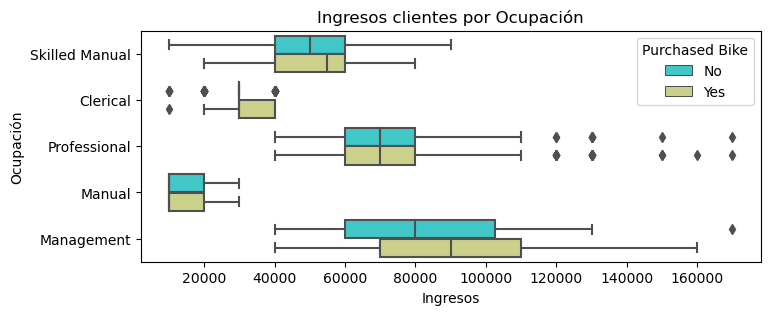

In [114]:
plt.figure(figsize=(8,3))
sns.boxplot(x='Income',y='Occupation',hue='Purchased Bike',data=bikes, palette = 'rainbow')
plt.xlabel('Ingresos')
plt.ylabel('Ocupación')
plt.title('Ingresos clientes por Ocupación')

Text(0.5, 1.0, 'Edad de clientes por su Ocupación')

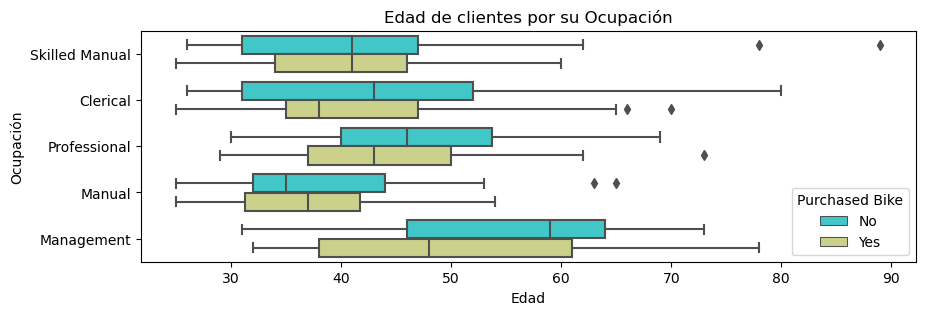

In [109]:
plt.figure(figsize=(10,3))
sns.boxplot(x='Age',y='Occupation',hue='Purchased Bike',data=bikes, palette = 'rainbow', orient= 'h')
plt.xlabel('Edad')
plt.ylabel('Ocupación')
plt.title('Edad de clientes por su Ocupación')

Text(0.5, 1.0, 'Distribución del Total de Clientes por Estado Civil y Adquisición de Bicicleta')

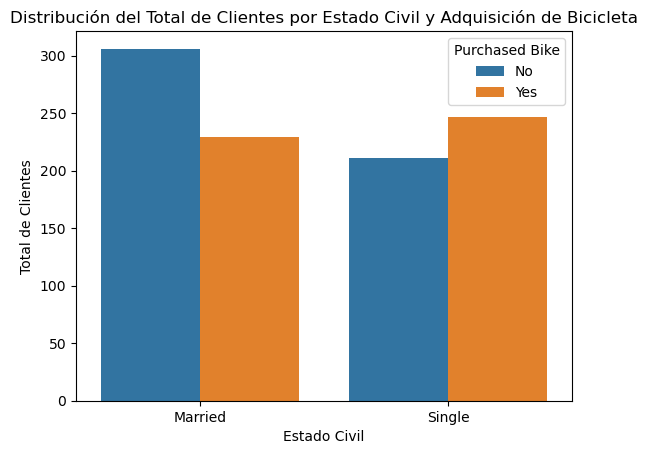

In [41]:
sns.countplot(x='Marital Status', hue='Purchased Bike', data = bikes)
plt.xlabel('Estado Civil')
plt.ylabel('Total de Clientes')
plt.title('Distribución del Total de Clientes por Estado Civil y Adquisición de Bicicleta')

Text(0.5, 1.0, 'Distribución del Total de Clientes por Ocupación y Adquisición de Bicicleta')

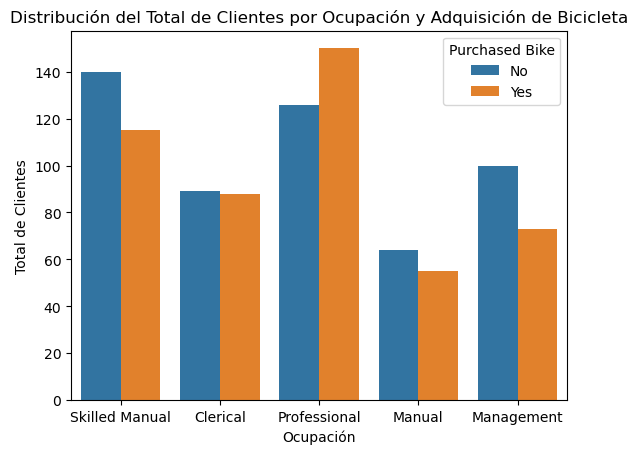

In [36]:
sns.countplot(x='Occupation',hue='Purchased Bike', data = bikes)
plt.xlabel('Ocupación')
plt.ylabel('Total de Clientes')
plt.title('Distribución del Total de Clientes por Ocupación y Adquisición de Bicicleta')

Text(0.5, 1.0, 'Distribución del Total de Clientes por Región y Adquisición de Bicicleta')

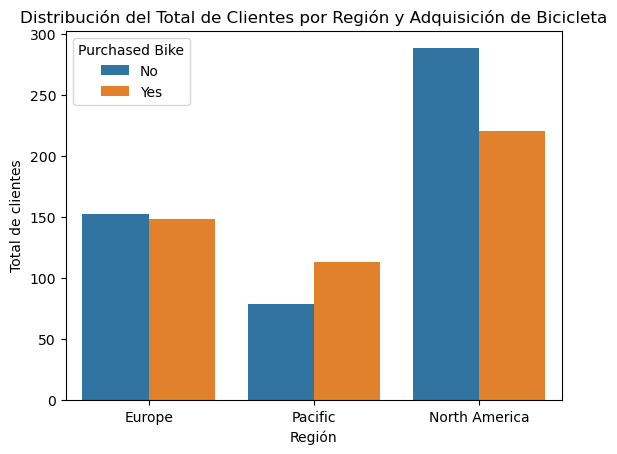

In [44]:
sns.countplot(x='Region', hue='Purchased Bike', data=bikes)
plt.xlabel('Región')
plt.ylabel('Total de clientes')
plt.title('Distribución del Total de Clientes por Región y Adquisición de Bicicleta')

Text(0.5, 1.0, 'Distribución del Total de Clientes por Adquisición de Propiedad y Adquisición de Bicicleta')

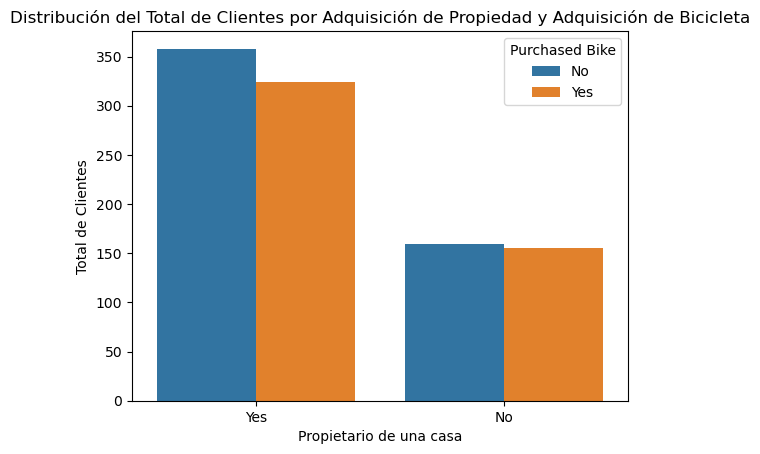

In [47]:
sns.countplot(x='Home Owner', hue = 'Purchased Bike', data = bikes)
plt.xlabel('Propietario de una casa')
plt.ylabel('Total de Clientes')
plt.title('Distribución del Total de Clientes por Adquisición de Propiedad y Adquisición de Bicicleta')

C:\Users\HP\AppData\Local\Temp\ipykernel_7536\4012078540.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bikes.corr(),cmap='coolwarm',annot=True)


<AxesSubplot: >

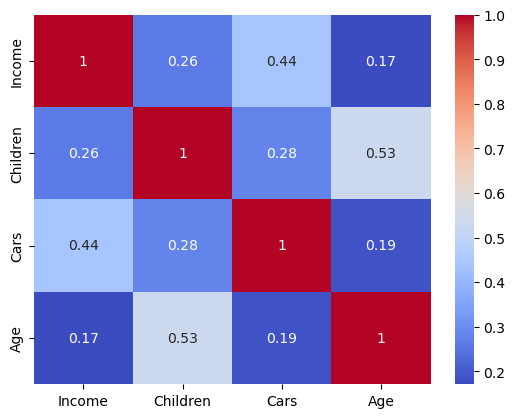

In [22]:
sns.heatmap(bikes.corr(),cmap='coolwarm',annot=True)